# Predicting Home Sale Price Through Regression Modeling

## Problem Statement


Since the industrial revolution the struggle between human and machine has been ongoing.

While much of data science is being automated there will still be a need for insights that come from intuitive thinking that computers have yet to match.

Using publically available housing data from Ames Iowa I will run three different scenarios showing that brute processing power of a machine cannot match the sly intuitiveness of a human.

## Executive Summary


### Contents:
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analyis](#Exploratory-Data-Analysis)
    * [Analysis](#Analysis)
    * [Data Visualization](#Data-Visualization)
    * [Data Cleaning](#Data-Cleaning)
    * [Feature Engineering](#Feature-Engineering)
- [Random Feature Selection and Model Evaluation](#Random-Feature-Selection-and-Model-Evaluation)
    * [Evaluating Random Model](#Evaluating-Random-Model)
- [User Inputed Feature Selection and Model Evaluation](#User-Inputed-Feature-Selection-and-Model-Evaluation)
    * [Outside Research](#Outside-Research)
    * [Evaluating User Model](#Evaluating-User-Model)
- [User Inputed and Random Feature Selection and Model Evaluation](#User-Inputed-and-Random-Feature-Selection-and-Model-Evaluation)
    * [Evaluating Combination Model](#Evaluating-Combination-Model)
- [Summary](#Summary)
    * [Conclusions](#Conclusions) 
    * [Recommendations](#Recommendations)

# Data Dictionary

[Data Descrtiptions from Ames, Iowa Assessor’s Office](https://git.generalassemb.ly/JEllena/submissions/blob/master/projects/02-project/data-dictionary.txt)

Dictionary copied from below

http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [1]:
# Importing and Option Setting

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import time

%matplotlib inline

# Option Setting
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

random_int_selector = 42
random.seed(random_int_selector)

# Exploratory Data Analysis

## Analysis

In [2]:
# Importing training data set
train = pd.read_csv('./datasets/train.csv')

train.shape

(2051, 81)

In [3]:
# Importing test data set
test = pd.read_csv('./datasets/test.csv')

test.shape

(878, 80)

In [4]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [5]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
# Checking for nulls
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [7]:
# Given that there are no rows with zero frontage or alley we will assume these are zeros rather then NaN
print(train.loc[train['Lot Frontage'] == 0].shape)

print(train.loc[train['Alley'] == 0].shape)

(0, 81)
(0, 81)


In [8]:
# Basements listed as NaN look to be properities without basements
train.loc[(train['Bsmt Qual'].isnull()) & (train['Bsmt Cond'].isnull()) & (train['Bsmt Exposure'].isnull())].head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
12,807,906226060,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,131000
93,811,906226100,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,6,2009,WD,118858
114,781,905228050,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,63900
146,888,908128060,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,198500
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,13100


In [9]:
# According to the data dictionary pulling rows with Fireplaces == 0 and Fireplace Qu == NaN should show incorrect data
train.loc[(train['Fireplaces'] == 0) & (train['Fireplace Qu'].isnull())].shape

(1000, 81)

In [10]:
# According to the data dictionary pulling rows with 'Garage Area' == 0 and other garage columns == NaN should show incorrect data
train.loc[(train['Garage Area'] == 0) & (train['Garage Qual'].isnull())].shape

(113, 81)

## Data Visualization

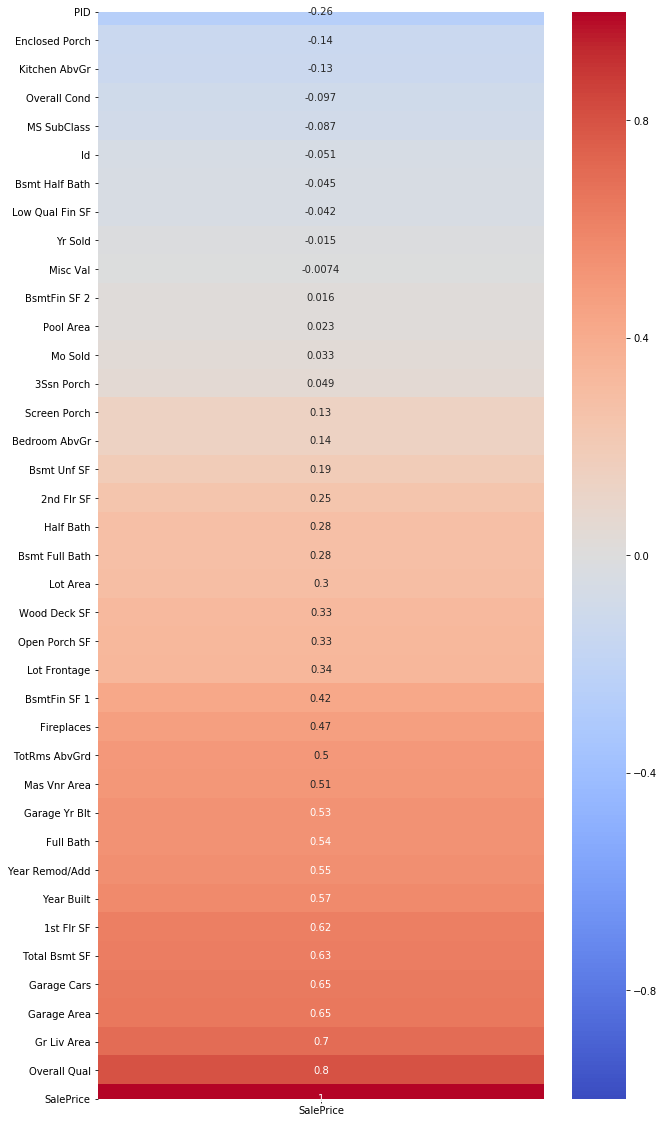

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10, 20))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), cmap='coolwarm', vmin=-1, vmax=1, annot=True);

Based on the correlation heatmap above we may want to consider the below features for modeling

* Overall Qual
* Gr Liv Area
* Garage Area
* Year Built

<Figure size 7200x1440 with 0 Axes>

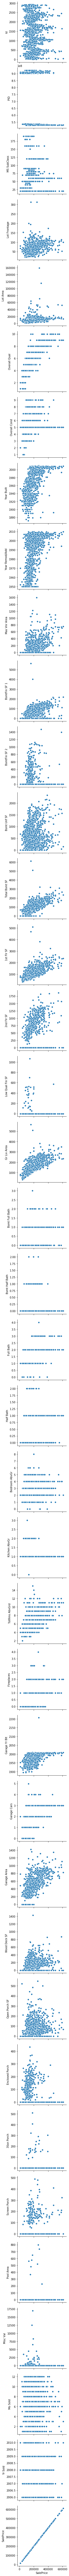

In [12]:
# Creating a list of columsn with numeric data
numeric_columns = list(train._get_numeric_data().columns)

plt.figure(figsize=(100, 20))
sns.pairplot(train, y_vars=numeric_columns, x_vars=['SalePrice'], height=3.5);

From the pairplot we can see potential influence from

* 1st Flr SF
* BsmtFin SF 1

## Data Cleaning

After reviewing the data and analyzing visualizations the following will be conducted:
- Dropped the PID column as it is not needed or any anlysis
- Replaced NaN values from ordinal columns with 'NA' or 0 where appropriate
- Generate dummy data for ordinal based columns
- Match dummy columns between train and test data

In [13]:
# Function to process all data cleaning
# Replacing incorrectly assigned NaN to be catagorical NA
def data_clean(dataframe):
    #Dropping PID columnn as it is not needed
    dataframe.drop(columns='PID', inplace=True)
    
    # Filling NaN to be 0 for continious columns or 'NA' for ordinal columns
    dataframe.fillna({'Lot Frontage'     : 0,
                      'Alley'            : 0,
                      'BsmtFin SF 1'     : 0,
                      'BsmtFin SF 2'     : 0,
                      'Bsmt Unf SF'      : 0,
                      'Total Bsmt SF'    : 0,
                      'Bsmt Full Bath'   : 0,
                      'Bsmt Half Bath'   : 0,
                      'Garage Cars'      : 0,
                      'Garage Area'      : 0,
                      'Mas Vnr Type'     :'NA', 
                      'Mas Vnr Area'     :0,
                      'Bsmt Qual'        :'NA',
                      'Bsmt Cond'        :'NA', 
                      'Bsmt Exposure'    :'NA', 
                      'BsmtFin Type 1'   :'NA', 
                      'BsmtFin Type 2'   :'NA',
                      'Fireplace Qu'     :'NA',
                      'Garage Type'      :'NA',
                      'Garage Yr Blt'    :0,
                      'Garage Finish'    :'NA',
                      'Garage Qual'      :'NA',
                      'Garage Cond'      :'NA',
                      'Pool QC'          :'NA',
                      'Fence'            :'NA',
                      'Misc Feature'     :'NA'
                     }, inplace=True)
    
    # Creating Dummy Variables for all ordinal columns
    dataframe = pd.get_dummies(dataframe, columns=dataframe.select_dtypes(['object']).columns, drop_first=True)
    
    return dataframe

In [14]:
# Applying data cleaning function to train data and reviewing shape
train = data_clean(train)

train.shape

(2051, 264)

In [15]:
# Applying data cleaning function to test data and reviewing shape
test = data_clean(test)

test.shape

(878, 244)

## Feature Engineering

Since get_dummies will only dummy values that are listed there would be a different number of mismatched columns beteween the training and the testing data sets.

The two loops below will iterate through each list and append the missing columns

In [16]:
# Creating a list of all numeric columns in train dataframe
columns_train = list(train.columns)

# Creating a list of all numeric columns in test dataframe
columns_test = list(test.columns)

# This loop will check for missing dummy columns in the test data and create them with 0s for values
for column in range(len(columns_train)):
    if columns_train[column] not in columns_test:
        test[str(columns_train[column])] = 0

# This loop will check for missing dummy columns in the train data and create them with 0s for values
for column in range(len(columns_test)):
    if columns_test[column] not in  columns_train:
        train[str(columns_test[column])] = 0

# Dropping the 'SalesPrice' column in the test data so predictions can be run on it
test.drop(columns='SalePrice', inplace=True)

In [17]:
train.shape

(2051, 273)

In [18]:
# Test should have one less column because we want to predice 'SalePrice' against it
test.shape

(878, 272)

# User Inputed Feature Selection and Model Evaluation

### Outside Research
- [Import Features that Drive Home Sales](https://homeia.com/10-important-features-to-consider-when-buying-a-house)

- [Additional Features that Sell](https://www.zillow.com/research/listing-features-that-sell-23814/)

- [Important Rooms and Types](https://www.extraspace.com/blog/moving/buying-selling-renting/home-features-buyers-want-most/)

- [Features Desired by New Home Buyers](https://www.zillow.com/resources/new-construction/surprising-features-buyers-want/)

From looking at the correlations in the above in the and pulling insights from the posted articles the features we will select are 

* Overall Qual
* Gr Liv Area
* Garage Area
* Year Built
* 1st Flr SF
* BsmtFin SF 1

## Evaluating User Model

In [19]:
# Defining a features set to use in a linear regression model
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Year Built', '1st Flr SF', 'BsmtFin SF 1']

In [20]:
def kaggle_output_user_selected(features_list, training_data, testing_data):
    
    # Generating X and y
    X = training_data[features_list]
    y = training_data['SalePrice']
    
    # Instantiating model
    linreg = LinearRegression()
    
    linreg = LinearRegression()
    # Train/Test/Split of data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_int_selector)
    
    # Fitting the regression model
    linreg.fit(X_train, y_train)
    
    # Calculating predictions
    predictions = linreg.predict(X_test)
    # Calculating Root Mean Squared Error and R^2_adjusted
    rmse_user = np.sqrt(mean_squared_error(y_test, predictions))
    r2_adj_user = 1 - ((1 - r2_score(y_test, predictions)) * (len(y) - 1) / (len(y) - len(X.columns) - 1))
    
    # Generating testing predicitions
    testing_data['SalePrice'] = linreg.predict(testing_data[features_list])
    
    # Creating dataframe with only desired columns
    test_results = testing_data[['Id', 'SalePrice']]
    
    # Outputting dataframe to csv
    test_results.to_csv('./kaggle-submission/kaggle-submission-user-selected.csv', index=False)
    
    return rmse_user, r2_adj_user, features_list

In [21]:
rmse_user, r2_adj_user, features_user = kaggle_output_user_selected(features, train, test)

# Random Feature Selection and Model Evaluation

The function below will randomly select a random mumber of features to run a regression with

It will then append the Root Mean Squared Error and R^2 Adjusted along with the features selected to both a data frame and output to a csv file

In [22]:
def linreg_run_rando(dataframe, number_of_runs):
    # Creating empty list, dictionary, and index key
    results_dict = {}
    values =[]
    key = 0
    # Creating list of possible features
    features = list(dataframe._get_numeric_data().columns)
    
    # To set the number of random features to chose we'll set the possible range as the square root of all feature +- 10%
    random_min = round(int(np.sqrt(len(list(dataframe._get_numeric_data().columns)))) * .9)
    random_max = round(int(np.sqrt(len(list(dataframe._get_numeric_data().columns)))) * 1.1)
    
    # Setting the seed for random to be call of current system time to reduce influence
    random.seed()
    
    # Setting y
    y = dataframe['SalePrice']
    
    # For loop to process number of regressions
    for i in range(number_of_runs):
        # Populating a features list with a random number of features
        X = train[list(np.random.choice(features, random.randint(random_min, random_max), replace=True))]
        # Instantiating model
        linreg = LinearRegression()
        # Train/Test/Split of data
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_int_selector)
        # Fitting the regression
        linreg.fit(X_train, y_train)
        # Calculating predictions
        predictions = linreg.predict(X_test)
        # Calculating Root Mean Squared Error and R^2_adjusted
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        r2_adj = 1 - ((1 - r2_score(y_test, predictions)) * (len(y) - 1) / (len(y) - len(X.columns) - 1))
        # Updating dictionary
        key += 1
        values = [rmse, r2_adj, list(X.columns)]
        results_dict.update({key : values})
    
    # Creating a data frame from the the result_dict dictionary
    results = pd.DataFrame.from_dict(results_dict, orient='index', columns=['RMSE', 'R^2 Adjusted', 'Features'])
     
    # Dropping any rows where R^2 is equal to 1 since this model would be overfit
    results.drop(results.loc[results['R^2 Adjusted'] > .9999].index, inplace=True)
    
    # Sorting results by R^2 Adjusted
    results.sort_values(by=['R^2 Adjusted'], ascending=False, inplace=True)
    results.reset_index(drop=True, inplace=True)
    
    # Outputting results to csv
    results.to_csv('./random-results/results_robo.csv', index=False)
    
    return results
        

In [23]:
'''For evaluation purposes it is recommended to keep the number of intervals to below 10,000'''

results = linreg_run_rando(train, 1000)

results.shape

(942, 3)

## Evaluating Random Model

In [24]:
results.head(10)

,RMSE,R^2 Adjusted,Features
0,35453.470722,0.793473,"[Total Bsmt SF, Exter Cond_Fa, Pool QC_TA, Yea..."
1,36104.595343,0.786028,"[Fence_MnPrv, MS Zoning_RH, Neighborhood_NoRid..."
2,36210.180831,0.784668,"[2nd Flr SF, House Style_SLvl, Bsmt Qual_Fa, H..."
3,36916.333761,0.776408,"[Exter Cond_Po, Garage Qual_Gd, Total Bsmt SF,..."
4,37514.787021,0.769213,"[Mas Vnr Area, BsmtFin SF 2, Mas Vnr Type_None..."
5,37730.028615,0.766557,"[Roof Matl_Roll, Overall Qual, Garage Cars, Fi..."
6,37827.206888,0.764891,"[1st Flr SF, Neighborhood_Greens, Garage Cond_..."
7,37960.238206,0.763468,"[1st Flr SF, Overall Qual, Paved Drive_P, Heat..."
8,38013.587017,0.762802,"[MS Zoning_FV, Neighborhood_MeadowV, Bsmt Expo..."
9,38246.848043,0.759764,"[Fireplace Qu_Gd, Kitchen Qual_Po, Exter Cond_..."


In [25]:
# Function for outputting submission data
#rmse_random = 0

def kaggle_output_random(results_list, training_data, testing_data, index_row_wanted):
    
    # Creating a features list
    features_list = list(results['Features'][index_row_wanted])
    
    # Generating X and y
    X = training_data[features_list]
    y = training_data['SalePrice']
    
     # Instantiating model
    linreg = LinearRegression()
    
    # Train/Test/Split of data
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Fitting the regression model
    linreg.fit(X_train, y_train)
    
    # Generating predictions list
    features_list = list(results_list['Features'][index_row_wanted])
    
    # Calculating Root Mean Squared Error and R^2_adjusted
    predictions = linreg.predict(X_test)
    global rmse_random
    rmse_random = np.sqrt(mean_squared_error(y_test, predictions))
    r2_adj_random = 1 - ((1 - r2_score(y_test, predictions)) * (len(y) - 1) / (len(y) - len(X.columns) - 1))
    
    # Generating testing predicitions
    testing_data['SalePrice'] = linreg.predict(testing_data[features_list])
    
    # Creating dataframe with only desired columns
    test_results = testing_data[['Id', 'SalePrice']]
    
    # Outputting dataframe to csv
    test_results.to_csv('./kaggle-submission/kaggle-submission-random.csv', index=False)
    
    return rmse_random, r2_adj_random, features_list

In [26]:
rmse_random, r2_adj_random, features_random = kaggle_output_random(results, train, test, 0)

# User Inputed and Random Feature Selection and Model Evaluation

Here will will test comining the user selected features in addtion to a random selection to see if there is an improvement in performance

In [27]:
def linreg_run_combo(dataframe, user_features, number_of_runs):
    # Creating empty list, dictionary, and index key
    results_dict = {}
    values =[]
    key = 0
    
    # Creating list of possible features
    features = list(dataframe._get_numeric_data().columns)
    # Removing user selected features so they cannot be selected twice in random feature selection
    features = [item for item in features if item not in user_features]
    
    # To set the number of random features to chose we'll set the possible range as the square root of all feature +- 10%
    random_min = round(int(np.sqrt(len(list(dataframe._get_numeric_data().columns)))) * .9)
    random_max = round(int(np.sqrt(len(list(dataframe._get_numeric_data().columns)))) * 1.1)
    
    # Setting y
    y = dataframe['SalePrice']
    
    # For loop to process number of regressions
    for i in range(number_of_runs):
        # Populating a features list with a random number of features
        X = train[user_features + list(np.random.choice(features, random.randint(random_min, random_max) - len(user_features)))]
        # Instantiating model
        linreg = LinearRegression()
        linreg = LinearRegression()
        # Train/Test/Split of data
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_int_selector)
        # Fitting the regression
        linreg.fit(X_train, y_train)
        # Calculating predictions
        predictions = linreg.predict(X_test)
        # Calculating Root Mean Squared Error and R^2_adjusted
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        r2_adj = 1 - ((1 - r2_score(y_test, predictions)) * (len(y) - 1) / (len(y) - len(X.columns) - 1))
        # Updating dictionary
        key += 1
        values = [rmse, r2_adj, list(X.columns)]
        results_dict.update({key : values})
    
    # Creating a data frame from the the result_dict dictionary
    results = pd.DataFrame.from_dict(results_dict, orient='index', columns=['RMSE', 'R^2 Adjusted', 'Features'])
     
    # Dropping any rows where R^2 is very close to 1 since this model would be overfit
    results.drop(results.loc[results['R^2 Adjusted'] > .9999].index, inplace=True)
    
    # Sorting results by R^2 Adjusted
    results.sort_values(by=['R^2 Adjusted'], ascending=False, inplace=True)
    results.reset_index(drop=True, inplace=True)
    
    # Outputting results to csv
    results.to_csv('./random-results/results_combo.csv', index=False)
    
    return results
        

In [28]:
'''For evaluation purposes it is recommended to keep the number of intervals to below 10,000'''

results = linreg_run_combo(train, features, 1000)

results.shape

(955, 3)

In [29]:
results.head()

,RMSE,R^2 Adjusted,Features
0,28287.526351,0.868652,"[Overall Qual, Gr Liv Area, Garage Area, Year ..."
1,28327.302668,0.868283,"[Overall Qual, Gr Liv Area, Garage Area, Year ..."
2,28648.477520,0.865279,"[Overall Qual, Gr Liv Area, Garage Area, Year ..."
3,28697.202092,0.864953,"[Overall Qual, Gr Liv Area, Garage Area, Year ..."
4,28738.603948,0.864296,"[Overall Qual, Gr Liv Area, Garage Area, Year ..."


## Evaluating Combination Model

In [30]:
# Function for outputting submission data
def kaggle_output_combo(results_list, training_data, testing_data, index_row_wanted):
    # Some intecepts may be a very lower number that could call an error
    # The function will run correctly but ignoring error for ease of worfklow
    np.seterr(over='ignore')
    
    
    # Creating a features list
    features_list = list(results['Features'][index_row_wanted])
    
    # Generating X and y
    X = training_data[features_list]
    y = training_data['SalePrice']
    
     # Instantiating model
    linreg = LinearRegression()
    
    # Train/Test/Split of data
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Fitting the regression model
    linreg.fit(X_train, y_train)
    
    # Generating predictions list
    features_list = list(results_list['Features'][index_row_wanted])
    
    # Generating testing predicitions
    testing_data['SalePrice'] = linreg.predict(testing_data[features_list])
    
    # Calculating predictions
    predictions = linreg.predict(X_test)
    # Calculating Root Mean Squared Error and R^2_adjusted
    rmse_combo = np.sqrt(mean_squared_error(y_test, predictions))
    r2_adj_combo = 1 - ((1 - r2_score(y_test, predictions)) * (len(y) - 1) / (len(y) - len(X.columns) - 1))
    
    # Creating dataframe with only desired columns
    test_results = testing_data[['Id', 'SalePrice']]
    
    # Outputting dataframe to csv
    test_results.to_csv('./kaggle-submission/kaggle-submission-combo.csv', index=False)
    
    return rmse_combo, r2_adj_combo, features_list

In [31]:
rmse_combo, r2_adj_combo, features_combo = kaggle_output_combo(results, train, test, 0)

# Summary

In [32]:
# Creating an empty dataframe to append summary data

summary_dict ={
    'User Selected'      : [round(rmse_user, 2),   round(r2_adj_user, 4),   len(features_user),   features_user],
    'Random'             : [round(rmse_random, 2), round(r2_adj_random, 4), len(features_random), features_random],
    'Combination'        : [round(rmse_combo, 2),  round(r2_adj_combo, 4),  len(features_combo),  features_combo]
}

summary = pd.DataFrame.from_dict(summary_dict, orient='index', columns=['RMSE', 'R^2 Adjusted', 'Number of Features', 'Features'])

# Setting column width to display
pd.set_option('display.max_colwidth', 400)

summary

,RMSE,R^2 Adjusted,Number of Features,Features
User Selected,30818.38,0.8449,6,"[Overall Qual, Gr Liv Area, Garage Area, Year Built, 1st Flr SF, BsmtFin SF 1]"
Random,51389.25,0.4920,18,"[Total Bsmt SF, Exter Cond_Fa, Pool QC_TA, Year Built, Enclosed Porch, Condition 1_PosA, Neighborhood_NWAmes, Fireplaces, Garage Cars, Roof Style_Mansard, Fence_GdWo, Bsmt Qual_TA, Gr Liv Area, Sale Type_VWD, Garage Cond_Fa, Bsmt Exposure_NA, Neighborhood_Somerst, Garage Qual_Gd]"
Combination,34600.54,0.7856,16,"[Overall Qual, Gr Liv Area, Garage Area, Year Built, 1st Flr SF, BsmtFin SF 1, Exterior 2nd_AsphShn, Exter Cond_Gd, BsmtFin SF 2, Garage Type_Basment, Kitchen Qual_Po, Total Bsmt SF, Bsmt Qual_TA, Heating QC_TA, Misc Val, Bsmt Qual_Gd]"


## Conclusions

To compare each model scenario we will use the R^2 adjusted metric as that will penalize data sets for having a large number of features.

As we can see both scenarios that had user selected input have an increase in R^2 of over five percent.

This significant increase in efficiency shows the value of human input.

The highest score of using both human insight and machine processing power points us to further integrating the two.

## Recommendations

- Compare levels of R^2 of different numbers of n
- Improve data cleaning with normalizations and standardizations
- Consider more feature engineering
- Develop random model to include all related dummies if one is selected
- Redevelop models with ElasticNet to account or large numerical data and numerous dummy columns